In [7]:
# Kết nối với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=af1b6b78de9e50421ca3847b963ca599fa6d6f6faa230c3ee71b49510fc7bc20
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [16]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from keras.models import model_from_json
import keras.utils as image
import dlib
import face_recognition
 

In [17]:
path = '/content/drive/MyDrive/UIT/Computer Vision/model'

In [18]:
emotion_model_json = path + '/emotion_model.json'
emotion_model_h5 = path + '/emotion_model.h5'

In [19]:
# Đường dẫn đến ảnh thứ nhất và ảnh thứ hai
image_path_1 = '/content/drive/MyDrive/UIT/Computer Vision/peiu.jpg'
image_path_2 = '/content/drive/MyDrive/UIT/Computer Vision/txm.jpg'

1/1 [==============================] - 0s 77ms/step


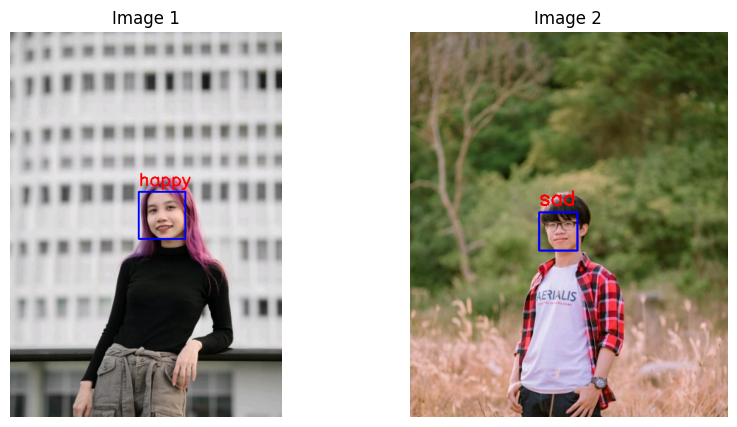

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def detect_emotions_image(image_path):
    # Load emotion recognition model
    model = model_from_json(open(emotion_model_json, "r").read())
    model.load_weights(emotion_model_h5)
    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

    # Read input image
    frame = cv2.imread(image_path)

    # Resize frame to desired size (40% of input size)
    frame = cv2.resize(frame, (int(frame.shape[1] * 0.4), int(frame.shape[0] * 0.4)))

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using face_recognition library
    face_locations = face_recognition.face_locations(gray)

    # Process each detected face
    for (top, right, bottom, left) in face_locations:
        # Draw bounding box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 0), thickness=2)

        # Extract ROI (Region of Interest) - face area from grayscale image
        roi_gray = gray[top:bottom, left:right]

        # Resize ROI to match the input size of emotion recognition model
        roi_gray = cv2.resize(roi_gray, (48, 48))

        # Convert ROI to array
        img_pixels = image.img_to_array(roi_gray)

        # Expand dimensions of the array
        img_pixels = np.expand_dims(img_pixels, axis=0)

        # Normalize pixel values
        img_pixels /= 255

        # Predict emotion using the model
        predictions = model.predict(img_pixels)

        # Find the emotion with the highest probability
        max_index = np.argmax(predictions[0])
        predicted_emotion = emotions[max_index]

        # Draw predicted emotion label on the frame
        cv2.putText(frame, predicted_emotion, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    return frame

# Dùng hàm detect_emotions_image để dự đoán cảm xúc trên từng ảnh và vẽ đường bao quanh khuôn mặt
result_1 = detect_emotions_image(image_path_1)
result_2 = detect_emotions_image(image_path_2)

# Lưu ảnh đã được xử lý
output_path_1 = 'output_image_1.jpg'
output_path_2 = 'output_image_2.jpg'
cv2.imwrite(output_path_1, result_1)
cv2.imwrite(output_path_2, result_2)

# Hiển thị ảnh đã được xử lý
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(result_1, cv2.COLOR_BGR2RGB))
axs[0].set_title('Image 1')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(result_2, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image 2')
axs[1].axis('off')
plt.show()
